In [261]:
#inport as needed and select params
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os


plt.rcParams['figure.figsize'] = (15,6)

In [262]:
#about the data
#The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann.
#In this dataset, each entry represents a person who takes a credit by a bank. 
#Each person is classified as good or bad credit risks according to the set of attributes.

#job category (0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - hghly skilled)


#read in file
df = pd.read_csv(".../german_credit_data.csv")

In [263]:
#Get first look at data
print('The shape of the matrix is', df.shape[1], 'categories by', df.shape[0], 'rows\n')

df.info()

The shape of the matrix is 10 categories by 1000 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [264]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [265]:
#Process data as needed
df.isnull().sum()


df['Saving accounts'].replace(np.nan,'little',inplace=True)
df['Checking account'].replace(np.nan,'little',inplace=True)

In [266]:
#Begin analysis
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


In [267]:
print('The total number of males is', df.Sex.value_counts().male, 'and female is', df.Sex.value_counts().female)

df.groupby('Sex')['Credit amount'].mean()

The total number of males is 690 and female is 310


Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [268]:
fig = px.histogram(df,
x = df['Purpose'].unique(),
y = df['Purpose'].value_counts(),
color = df['Purpose'].unique(),
color_discrete_sequence = px.colors.sequential.deep,
template = 'plotly_dark')

fig.update_layout(
    title = {
        'text': 'Total Counts of Each Credit Withdrawl Type',
        'x' : 0.5,
        'yanchor':'top'
    },
    xaxis_title = '',
    yaxis_title = 'Total Count'
)

Text(0.5, 1.0, 'Distribution of Age for Males and Females')

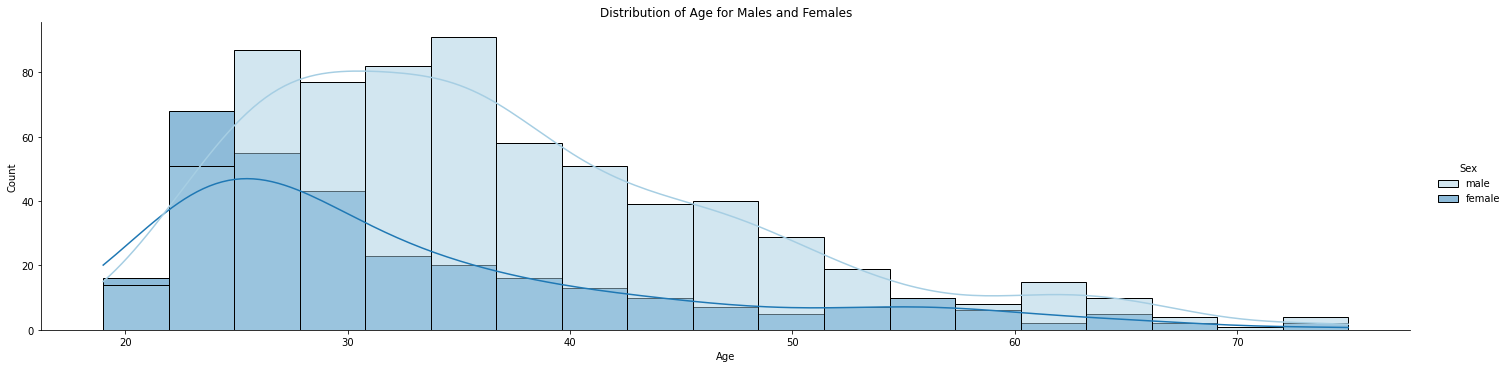

In [269]:
# Age distribution sex-wise
sns.displot(data = df,
x = 'Age',
hue = 'Sex',
kde = True,
palette = 'Paired',
aspect = 4)

plt.title('Distribution of Age for Males and Females')


([<matplotlib.axis.XTick at 0x7fa7d3515490>,
 [Text(0, 0, 'unskilled and non-resident'),
  Text(1, 0, 'unskilled and resident'),
  Text(2, 0, 'skilled'),
  Text(3, 0, 'highly skilled')])

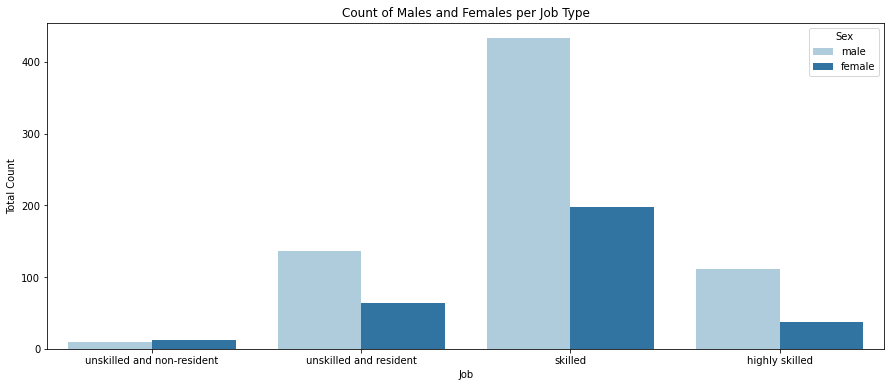

In [270]:
# sex vs credit amount 
fig = px.histogram(df,
x = df['Sex'],
y = df['Credit amount'],
template = 'plotly_dark',
color_discrete_sequence = px.colors.sequential.deep)

fig.update_layout(
    yaxis_title = 'Sum of Credit Amount ($)',
    title = {
        'text': 'Sum of Credit Amount ($) By Gender',
        'x': 0.5,
        'yanchor': 'top'
    }
)

fig.show()

# Job 
fig = sns.countplot(data = df,
x = 'Job',
hue = 'Sex',
palette = 'Paired')

plt.title('Count of Males and Females per Job Type')
plt.ylabel('Total Count')
plt.xticks([0,1,2,3], ['unskilled and non-resident','unskilled and resident','skilled','highly skilled'])



Text(0, 0.5, 'Total Count')

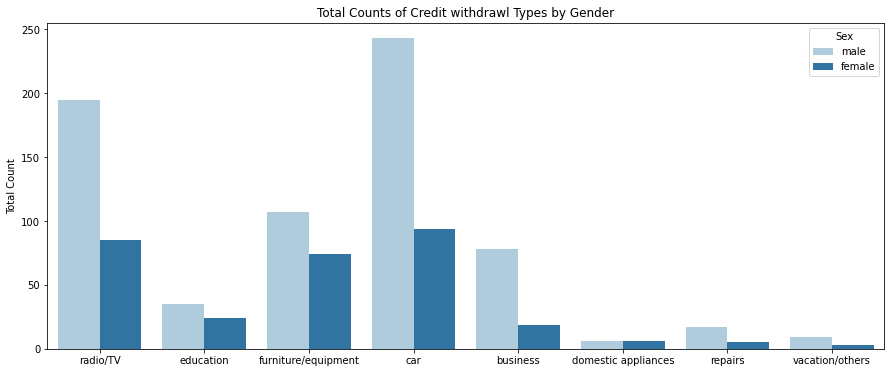

In [271]:
sns.countplot(data = df,
x = 'Purpose',
hue = 'Sex',
palette = 'Paired');

plt.title('Total Counts of Credit withdrawl Types by Gender')
plt.xlabel('')
plt.ylabel('Total Count')

Text(5.329791666666665, 0.5, 'Total Count')

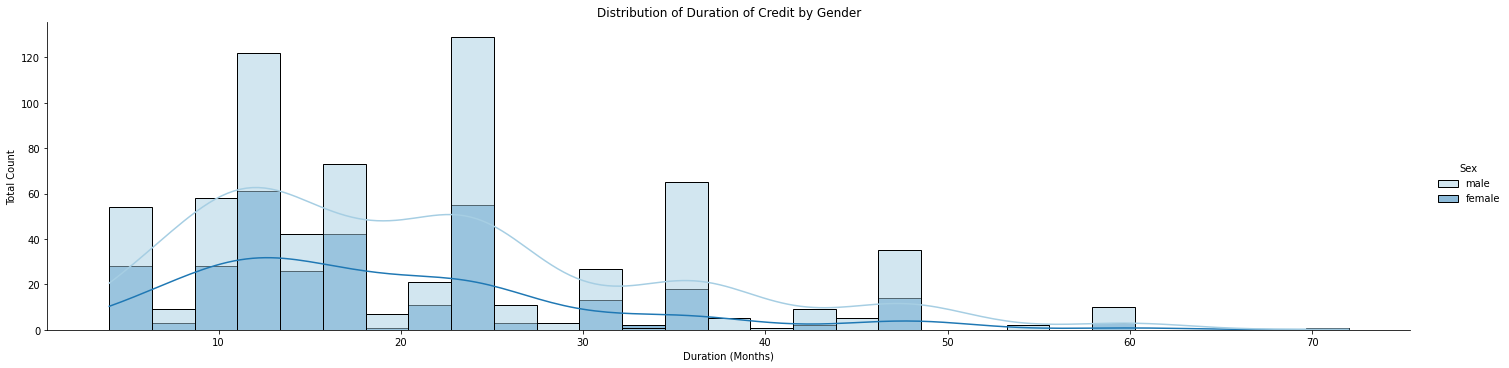

In [272]:
# Duration by Sex
sns.displot(data = df,
x = 'Duration',
hue = 'Sex',
kde = True,
palette = 'Paired',
aspect = 4
)

plt.title('Distribution of Duration of Credit by Gender')
plt.xlabel('Duration (Months)')
plt.ylabel('Total Count')



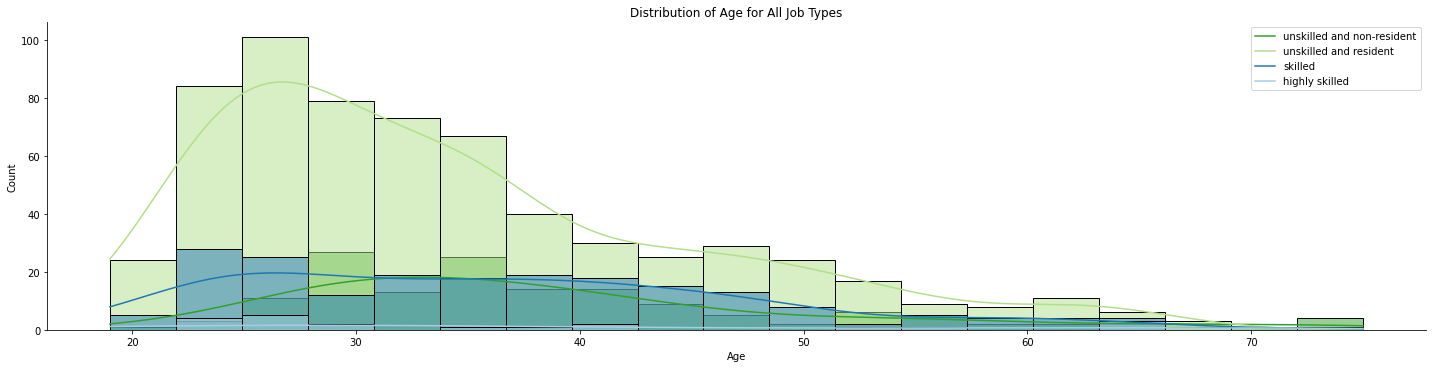

In [273]:
# Age distribution while having different jobs
sns.displot(data = df,
x = df['Age'],
hue = df['Job'],
kde = True,
palette = 'Paired',
aspect = 4,
legend = False
)

plt.title('Distribution of Age for All Job Types')
plt.legend(['unskilled and non-resident','unskilled and resident','skilled','highly skilled'])


In [274]:
fig = px.histogram(df,
x = df['Credit amount'],
color = df['Saving accounts'],
template = 'plotly_dark',
marginal = 'box',
color_discrete_sequence = px.colors.sequential.deep)

fig.update_layout(barmode = 'group',
yaxis_title = 'Count',
xaxis_title = 'Credit Amount ($)',
title = 'Distribution of Credit Amount by Saving Account Amount Category')

In [275]:
fig = px.histogram(df,
x = 'Credit amount',
color = df['Checking account'],
template = 'plotly_dark',
marginal = 'box',
color_discrete_sequence = px.colors.sequential.deep)

fig.update_layout(barmode = 'group',
yaxis_title = 'Count',
xaxis_title = 'Credit Amount ($)',
title = 'Distribution of Credit Amount by Checking Account Amount Category')

Text(0, 0.5, 'Total Count')

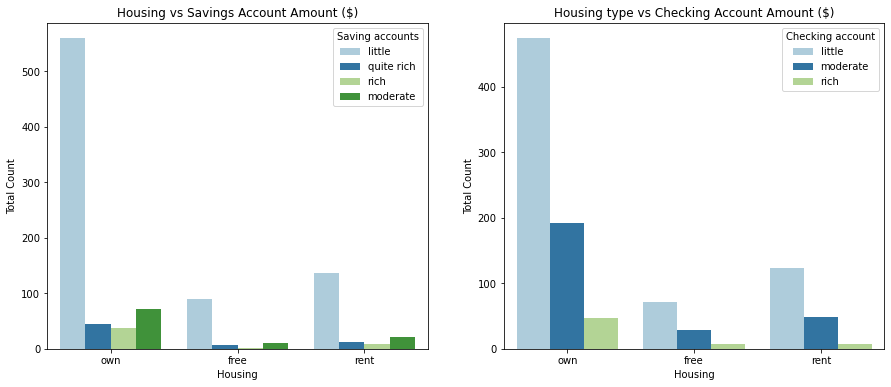

In [276]:
# Housing vs Saving account
plt.subplot(1,2,1)

sns.countplot(x = 'Housing',
data = df,
hue = 'Saving accounts',
palette = 'Paired')

plt.title('Housing vs Savings Account Amount ($)')
plt.ylabel('Total Count')

# Housing vs Checking account
plt.subplot(1,2,2)
fig2 = sns.countplot(x = 'Housing',
data = df,
hue = 'Checking account',
palette = 'Paired')

plt.title('Housing type vs Checking Account Amount ($)')
plt.ylabel('Total Count')


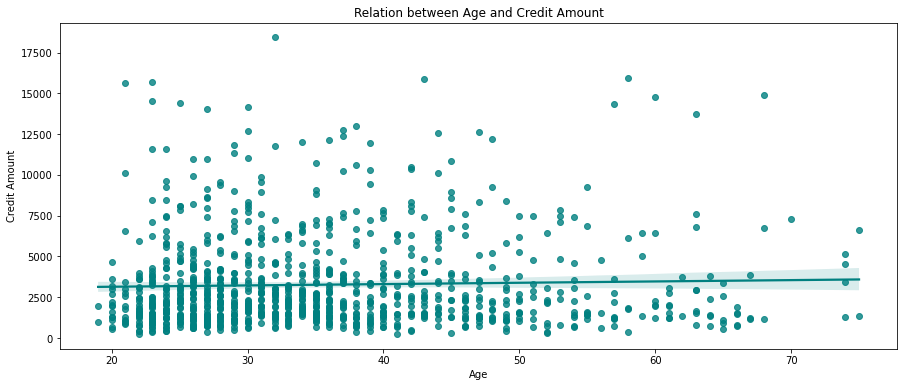

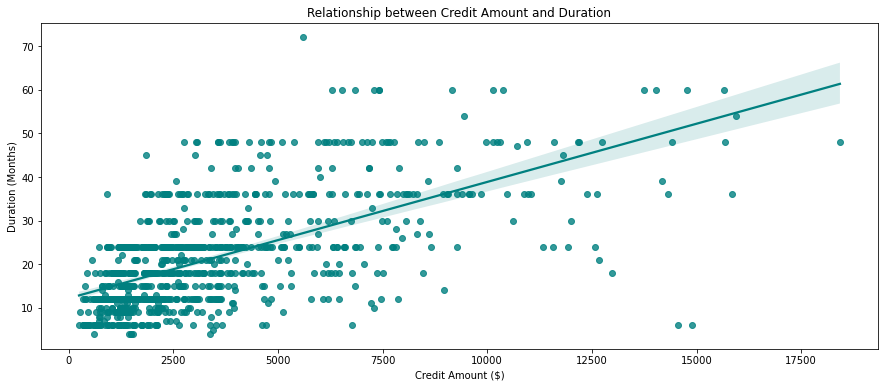

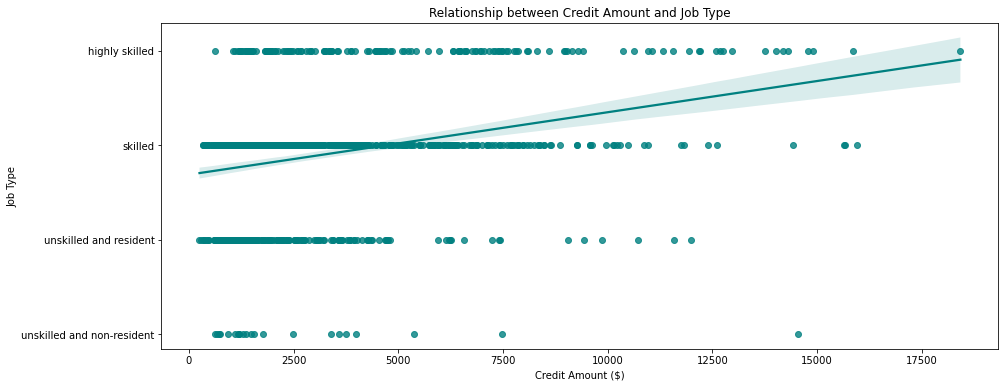

In [277]:
sns.regplot(data = df,
x = 'Age', 
y = 'Credit amount',
fit_reg = True,
color = 'teal'
)

plt.title("Relation between Age and Credit Amount")
plt.xlabel("Age")
plt.ylabel("Credit Amount")

plt.show()

sns.regplot(data = df, 
x = 'Credit amount', 
y = 'Duration',
fit_reg = True,
color = 'teal')

plt.title("Relationship between Credit Amount and Duration")
plt.xlabel("Credit Amount ($)")
plt.ylabel("Duration (Months)")

plt.show()

sns.regplot(data = df, 
x = 'Credit amount', 
y = 'Job',
fit_reg = True,
color = 'teal')

plt.title("Relationship between Credit Amount and Job Type")
plt.xlabel("Credit Amount ($)")
plt.ylabel("Job Type")
plt.yticks([0,1,2,3], ['unskilled and non-resident','unskilled and resident','skilled','highly skilled'])

plt.show()

